In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 분류형 선형 모델
### 이진 분류(Binary Classification)
- 예측의 위한 방정식은 선형회귀와 유사하ㅏ다. 
- 예측한 값을 임계치와 비교하여 임계치보다 작으면 0, 아니면 1이라고 판단하여 분류한다. (보통 여기서 사용하는 식은 sigmoid)
- 분류형 선형 모델에서는 결정 경계가 선형함수이다. 
- 대표적인 선형 분류 알고리즘은 로지스틱 회귀와 선형 서포트 벡터 머신이 있다. 


## Logistic 회귀분석
## SVM(Support Vector Machine)


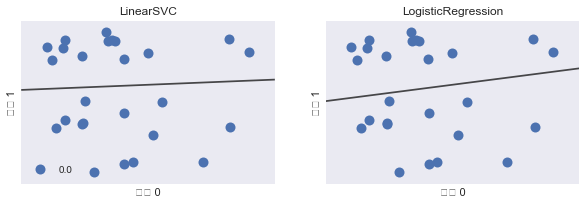

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax= ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- C값은 높아질수록 개개의 데이터포인트들을 분류하려고 하고(overfitting) 낮을수록 느슨하게 분류한다 (underfitting)

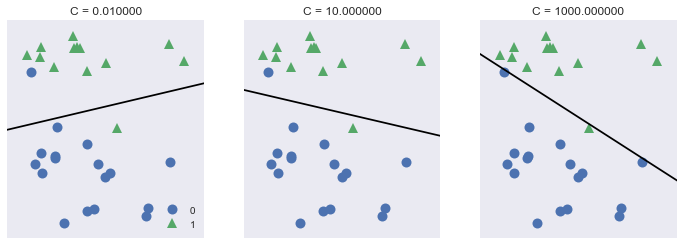

In [3]:
mglearn.plots.plot_linear_svc_regularization()

## More detail about Logistic Regression

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

NameError: name 'train_test_split' is not defined

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg001.score(X_test, y_test)))

In [ ]:
plt.plot(logreg.coef_.T, 'o', label = 'c=1')
plt.plot(logreg100.coef_.T, '^', label = 'c=100')
plt.plot(logreg001.coef_.T, 'v', label = 'c=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.legend()

# 로지스틱회귀는 기본적으로 L2규제를 적용하므로 릿지회귀와 비슷한 모습을 보인다.
#C= 100, C=1일때 계수는 음수지만 C=0.01일때는 양수가 되고 절댓값도 크다. 이를 해석하면 클래스의 특성의 연관성을 알려줄수 있다.
#예를 들면 '높은 Textureerror특성은 악성인 샘플과 관련이 깊다. 그러나 mean perimeter계수의 바뀌는 것으로 보아 높은 mean perimeter
# 의 값은 양성이나 악성의 신호 모두가 될 수 있다. 선형모델의 계수는 항상 의심해봐야하고 조심해서 해석해야 한다. 

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', 'v', '^']):
    logistic = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("C = {:.3f}인 L1 로지스틱 회귀의 훈련정확도: {:.2f}".format(C, logistic.score(X_train, y_train)))
    print("C = {:.3f}인 L1 로지스틱 회귀의 테스트정확도: {:.2f}".format(C, logistic.score(X_test, y_test)))
    plt.plot(logistic.coef_.T, marker, label = 'C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('features')
plt.ylabel('Coefficients')

plt.ylim(-5, 5)
plt.legend()

# 다중 클래스 분류용 선형 모델

### one vs rest 방법
- 각 클래스를 다른 모든 클래스와 구분하도로고 학습시키고, 클래스의 수 만큼 이진 분류를 진행한다.
- 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다. 
- 클래스별로 이진 분류기를 만들어지면 weight와 bias가 클래스 숫자만큼 나타나게 된다.

- 다중클래스에서 로지스틱 회귀분석은 sigmoid 함수대신 softmax 함수를 사용한다. 
- 소프트맥스의 계산은pr(y(i) =c) =  e^(W(c) * x(i))/summation(e^(W(k) * x(i)) 로 이루어지며 sigmoid와 마찬가지로 확률형태로 나타난다. 


\begin{equation*}
P(Y_i = c)=\frac{e^{W_c X_i + b}}{\sum_{k=1}^n e^{W_k X_i + b}}
\end{equation*}

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 1', 'class2', 'class3'])

# LinearSVC


In [ ]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열 크기 :', linear_svm.coef_.shape)
print('절편 배열 크기 :', linear_svm.intercept_.shape)

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.xlabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 3', 'class 0 Boundary', 'class 1 Boundary', 'class 3 Boundary'])

- 훈련데이터의 각 클래스에 속한 모든 포인트는 각 클래스를 구분하는 직선을 경계로 나머지 포인트 들과 구분된다. 


In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.xlabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 3', 'class 0 Boundary', 'class 1 Boundary', 'class 3 Boundary'])   

## 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고, LinearSVC와 LogisticRegression에서는 C이다
- alpha값이 클수록, C값이 작을 수록 모델이 단순해진다.
- 중요한 특성이 많지 않다고 생각하면 L1규제를 사용하고, 그렇지 않으면 기본적으로 L2규제를 사용한다. 
- L1 규제는 모델의 몇 가지 특성만 사용하므로, 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명가능
- solver 매개변수에 'sag'옵션을 사용하면 Stochastic Average Gradient Descent(확률적 평균 강사 하강법)을 사용, 반복이 진행될때 이전에 구한 경사의 평균을 사용하여 계수를 갱신하기 때문에 학습이 빨라진다. 

# 나이브 베이즈(Naive Bayes) 분류기
- 로지스틱 회귀와 LinearSVC에 비해 훈련 속도가 빠르지만, 일반화 성능이 약간 낮음
- 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스 별 통계를 단순하게 취합한다. 
- sklearn의 나이브 베이즈는 GaussianNB, BernoulliNB, MultinomialNB가 있다. 
- GaussianNB : 연속적인 어떤 데이터에도 적용가능 / 클래스별로 각 특성의 표준편차와 평균 / 매우 고차원적인 데이터셋에 사용
- BernoulliNB : 이진데이터에 적용 가능
- MultinomialNB: 카운트 데이터에 적용 가능 / 클래스 별로 특성의 평균 계산
- BernoulliNB, MultinomialNB 는 보통 텍스트 데이터같은 희소한 데이터를 분류하는데에 사용함.

In [ ]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [ ]:
counts = {}
for label in np.unique(y):
    #클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis = 0)
print('특성 카운트 : \n{}'.format(counts))

#  장단점과 매개변수
- BernoulliNB, MultinomialNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나이다. 
- 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함으로써 통계 데이터를 완만하게 만들어준다. 
- alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다. 
- alpha값에 따라 성능 변동은 크지 않으나, 어느정도 정확도를 높일 수 있다. 

In [ ]:
# 분류형 선형 모델
### 이진 분류(Binary Classification)
- 예측의 위한 방정식은 선형회귀와 유사하ㅏ다. 
- 예측한 값을 임계치와 비교하여 임계치보다 작으면 0, 아니면 1이라고 판단하여 분류한다. (보통 여기서 사용하는 식은 sigmoid)
- 분류형 선형 모델에서는 결정 경계가 선형함수이다. 
- 대표적인 선형 분류 알고리즘은 로지스틱 회귀와 선형 서포트 벡터 머신이 있다. 


## Logistic 회귀분석
## SVM(Support Vector Machine)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax= ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- C값은 높아질수록 개개의 데이터포인트들을 분류하려고 하고(overfitting) 낮을수록 느슨하게 분류한다 (underfitting)

mglearn.plots.plot_linear_svc_regularization()

## More detail about Logistic Regression

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg001.score(X_test, y_test)))

plt.plot(logreg.coef_.T, 'o', label = 'c=1')
plt.plot(logreg100.coef_.T, '^', label = 'c=100')
plt.plot(logreg001.coef_.T, 'v', label = 'c=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.legend()

# 로지스틱회귀는 기본적으로 L2규제를 적용하므로 릿지회귀와 비슷한 모습을 보인다.
#C= 100, C=1일때 계수는 음수지만 C=0.01일때는 양수가 되고 절댓값도 크다. 이를 해석하면 클래스의 특성의 연관성을 알려줄수 있다.
#예를 들면 '높은 Textureerror특성은 악성인 샘플과 관련이 깊다. 그러나 mean perimeter계수의 바뀌는 것으로 보아 높은 mean perimeter
# 의 값은 양성이나 악성의 신호 모두가 될 수 있다. 선형모델의 계수는 항상 의심해봐야하고 조심해서 해석해야 한다. 

for C, marker in zip([0.001, 1, 100], ['o', 'v', '^']):
    logistic = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("C = {:.3f}인 L1 로지스틱 회귀의 훈련정확도: {:.2f}".format(C, logistic.score(X_train, y_train)))
    print("C = {:.3f}인 L1 로지스틱 회귀의 테스트정확도: {:.2f}".format(C, logistic.score(X_test, y_test)))
    plt.plot(logistic.coef_.T, marker, label = 'C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('features')
plt.ylabel('Coefficients')

plt.ylim(-5, 5)
plt.legend()

# 다중 클래스 분류용 선형 모델

### one vs rest 방법
- 각 클래스를 다른 모든 클래스와 구분하도로고 학습시키고, 클래스의 수 만큼 이진 분류를 진행한다.
- 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다. 
- 클래스별로 이진 분류기를 만들어지면 weight와 bias가 클래스 숫자만큼 나타나게 된다.

- 다중클래스에서 로지스틱 회귀분석은 sigmoid 함수대신 softmax 함수를 사용한다. 
- 소프트맥스의 계산은pr(y(i) =c) =  e^(W(c) * x(i))/summation(e^(W(k) * x(i)) 로 이루어지며 sigmoid와 마찬가지로 확률형태로 나타난다. 


\begin{equation*}
P(Y_i = c)=\frac{e^{W_c X_i + b}}{\sum_{k=1}^n e^{W_k X_i + b}}
\end{equation*}

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 1', 'class2', 'class3'])

# LinearSVC


linear_svm = LinearSVC().fit(X, y)
print('계수 배열 크기 :', linear_svm.coef_.shape)
print('절편 배열 크기 :', linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.xlabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 3', 'class 0 Boundary', 'class 1 Boundary', 'class 3 Boundary'])

- 훈련데이터의 각 클래스에 속한 모든 포인트는 각 클래스를 구분하는 직선을 경계로 나머지 포인트 들과 구분된다. 


mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.xlabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 3', 'class 0 Boundary', 'class 1 Boundary', 'class 3 Boundary'])   

## 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고, LinearSVC와 LogisticRegression에서는 C이다
- alpha값이 클수록, C값이 작을 수록 모델이 단순해진다.
- 중요한 특성이 많지 않다고 생각하면 L1규제를 사용하고, 그렇지 않으면 기본적으로 L2규제를 사용한다. 
- L1 규제는 모델의 몇 가지 특성만 사용하므로, 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명가능
- solver 매개변수에 'sag'옵션을 사용하면 Stochastic Average Gradient Descent(확률적 평균 강사 하강법)을 사용, 반복이 진행될때 이전에 구한 경사의 평균을 사용하여 계수를 갱신하기 때문에 학습이 빨라진다. 

# 나이브 베이즈(Naive Bayes) 분류기
- 로지스틱 회귀와 LinearSVC에 비해 훈련 속도가 빠르지만, 일반화 성능이 약간 낮음
- 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스 별 통계를 단순하게 취합한다. 
- sklearn의 나이브 베이즈는 GaussianNB, BernoulliNB, MultinomialNB가 있다. 
- GaussianNB : 연속적인 어떤 데이터에도 적용가능 / 클래스별로 각 특성의 표준편차와 평균 / 매우 고차원적인 데이터셋에 사용
- BernoulliNB : 이진데이터에 적용 가능
- MultinomialNB: 카운트 데이터에 적용 가능 / 클래스 별로 특성의 평균 계산
- BernoulliNB, MultinomialNB 는 보통 텍스트 데이터같은 희소한 데이터를 분류하는데에 사용함.

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    #클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis = 0)
print('특성 카운트 : \n{}'.format(counts))

#  장단점과 매개변수
- BernoulliNB, MultinomialNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나이다. 
- 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함으로써 통계 데이터를 완만하게 만들어준다. 
- alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다. 
- alpha값에 따라 성능 변동은 크지 않으나, 어느정도 정확도를 높일 수 있다. import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline